In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# โหลดโมเดลที่ฝึกสอนแล้ว
model = YOLO('train/weights/best.pt')




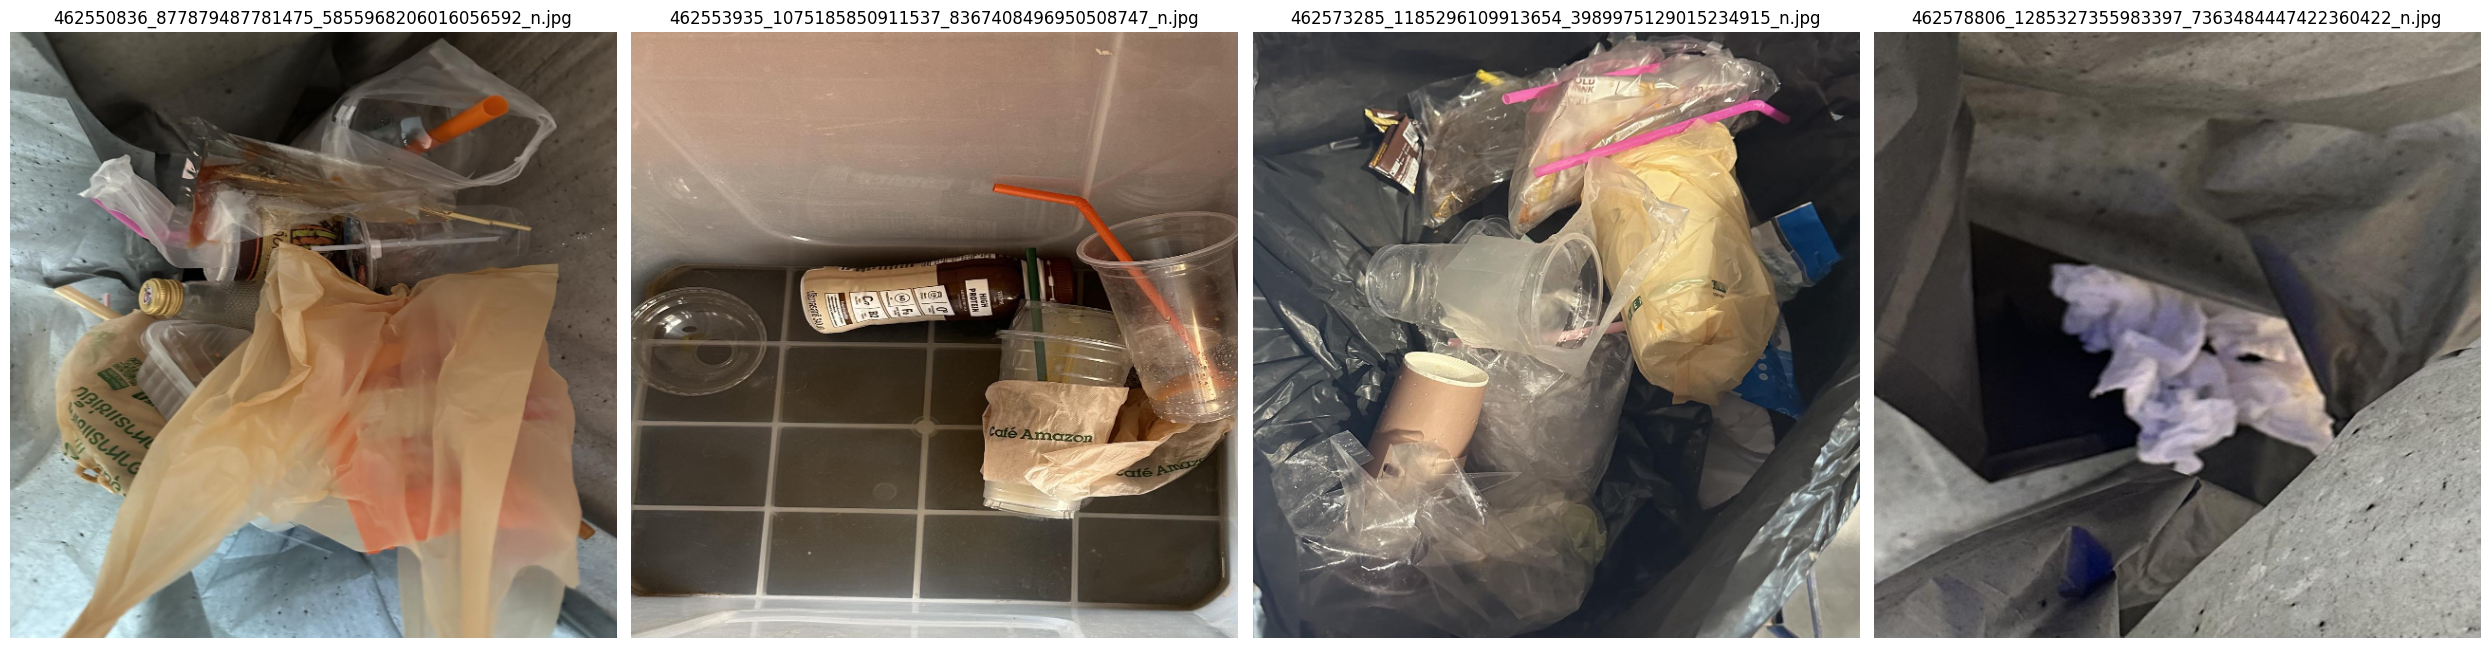

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# กำหนด path ของโฟลเดอร์ที่มีภาพ
folder_path = "tu_waste_2"
# สร้างรายการชื่อไฟล์ภาพ
images = []

# วนลูปผ่านภาพในโฟลเดอร์
for filename in os.listdir(folder_path):
    # ตรวจสอบว่าไฟล์มีนามสกุลที่ถูกต้อง
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # โหลดภาพ
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)  # ใช้ OpenCV ในการอ่านภาพ
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # แปลงสีจาก BGR เป็น RGB
        image_resized = cv2.resize(image_rgb, (640, 640))  # ปรับขนาดภาพเป็น 640x640
        images.append((image_resized, filename))  # เพิ่มภาพและชื่อไฟล์ในรายการ

# สร้าง subplot สำหรับการแสดงภาพ
num_images = len(images)
plt.figure(figsize=(25, 10))  # กำหนดขนาดของภาพรวม

# วนลูปแสดงภาพทั้งหมด
for i, (img, title) in enumerate(images):
    plt.subplot(1, num_images, i + 1)  # สร้าง subplot ในแถวเดียว
    plt.imshow(img)
    plt.title(title)  # แสดงชื่อไฟล์
    plt.axis('off')  # ปิดแกน

plt.tight_layout()  # ปรับระยะห่าง
plt.show()  # แสดงผล



0: 640x640 4 Single-use carrier bags, 1 Styrofoam piece, 412.0ms
Speed: 2.0ms preprocess, 412.0ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plastic straw, 412.4ms
Speed: 2.0ms preprocess, 412.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Paper cup, 3 Single-use carrier bags, 443.6ms
Speed: 3.0ms preprocess, 443.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Corrugated carton, 1 Plastic film, 409.8ms
Speed: 3.0ms preprocess, 409.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


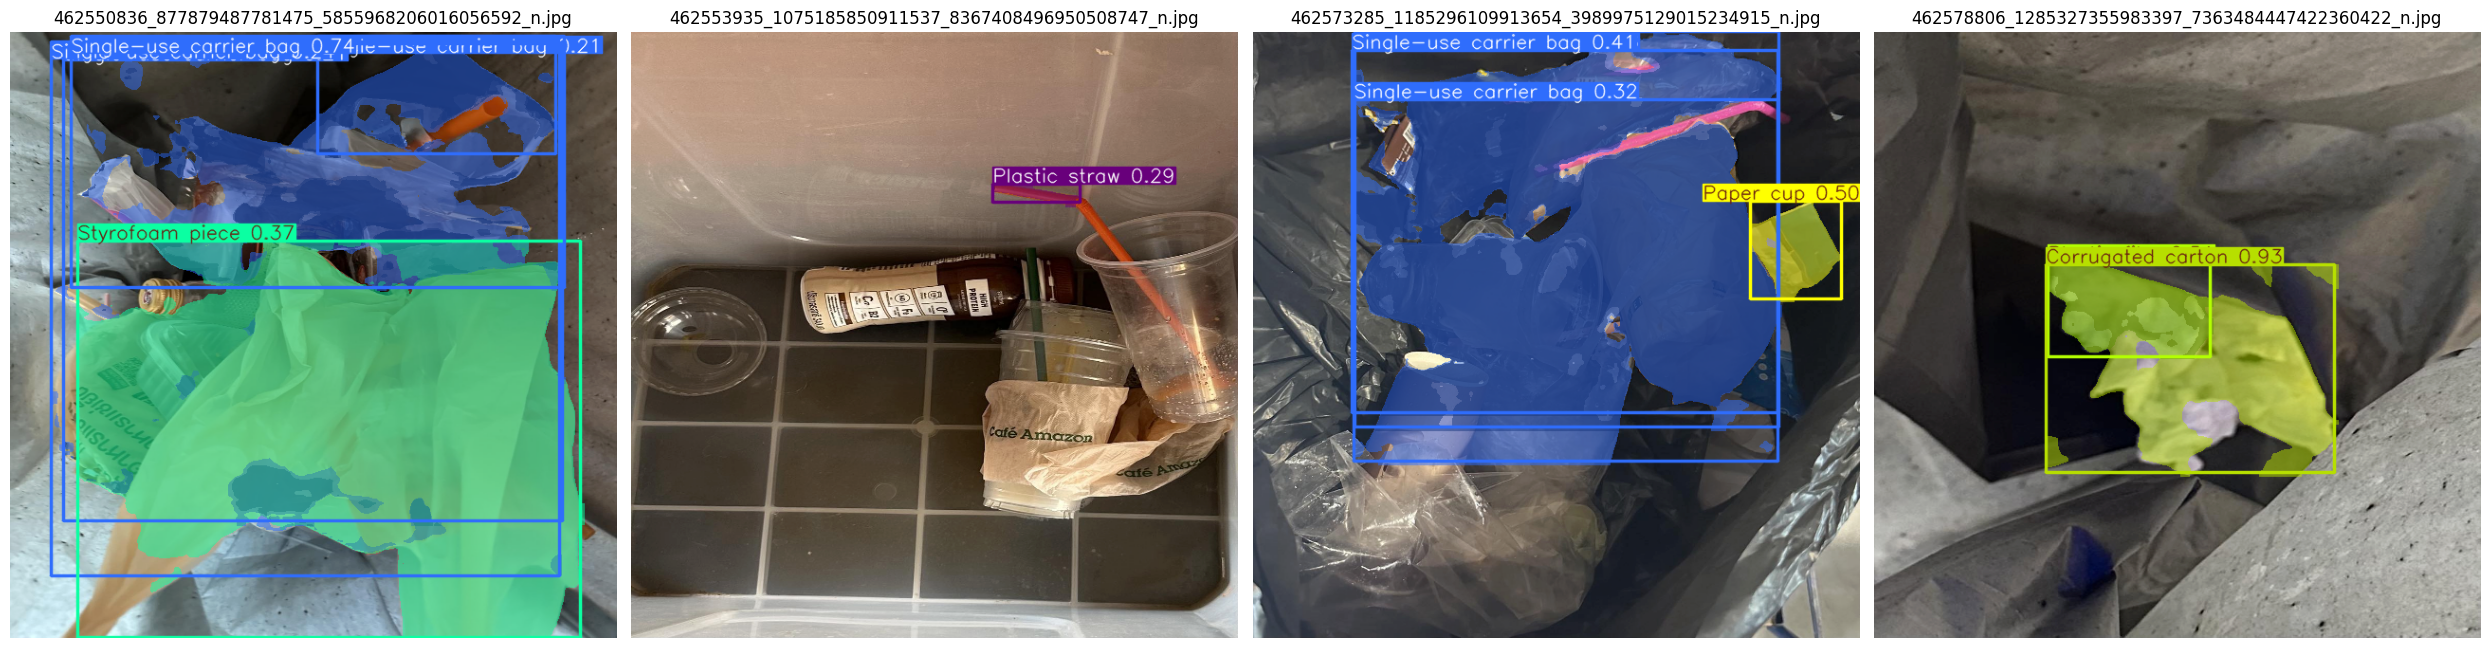

จำนวนขยะที่พบ:
Single-use carrier bag: 7
Styrofoam piece: 1
Plastic straw: 1
Paper cup: 1
Corrugated carton: 1
Plastic film: 1


In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import yaml
from collections import defaultdict

# โหลดโมเดลที่ฝึกสอนแล้ว
model = YOLO('train/weights/best.pt')

# กำหนด path ของโฟลเดอร์ที่มีภาพ
folder_path = "tu_waste_2"

# อ่านชื่อ class จากไฟล์ data.yaml
with open('data.yaml', 'r') as file:
    data = yaml.safe_load(file)
    class_mapping = {i: name for i, name in enumerate(data['names'])}  # สร้าง dictionary จากชื่อ class

# สร้าง dictionary สำหรับนับจำนวน class
class_counts = defaultdict(int)

# สร้างรายการสำหรับภาพที่มีการ annotate
annotated_images = []

# วนลูปผ่านภาพในโฟลเดอร์
for filename in os.listdir(folder_path):
    # ตรวจสอบว่าไฟล์มีนามสกุลที่ถูกต้อง
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # โหลดภาพ
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)  # ใช้ OpenCV ในการอ่านภาพ
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # แปลงสีจาก BGR เป็น RGB
        image_resized = cv2.resize(image_rgb, (640, 640))  # ปรับขนาดภาพเป็น 640x640

        # ทำการประมวลผลภาพ
        results = model(image_resized, conf=0.2, iou=0.9)  # ทำการตรวจจับวัตถุในภาพ

        # วาดผลลัพธ์ลงบนภาพ
        annotated_image = results[0].plot()  # สร้างภาพที่มีการ annotate
        annotated_images.append((annotated_image, filename))  # เก็บภาพที่ annotate

        # นับจำนวน class ที่พบ
        for result in results[0].boxes.data:
            class_id = int(result[5])  # ID ของ class
            class_name = class_mapping.get(class_id, "Unknown")  # รับชื่อ class
            class_counts[class_name] += 1  # เพิ่มจำนวน class ที่พบ

# สร้าง subplot สำหรับการแสดงภาพ
num_images = len(annotated_images)
plt.figure(figsize=(25, 10))  # กำหนดขนาดของภาพรวม

# วนลูปแสดงภาพทั้งหมด
for i, (img, title) in enumerate(annotated_images):
    plt.subplot(1, num_images, i + 1)  # สร้าง subplot ในแถวเดียว
    plt.imshow(img)
    plt.title(title)  # แสดงชื่อไฟล์
    plt.axis('off')  # ปิดแกน

plt.tight_layout()  # ปรับระยะห่าง
plt.show()  # แสดงผล

# แสดงผลสถิติ class ที่พบ
print("จำนวนขยะที่พบ:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")



0: 640x640 4 Single-use carrier bags, 1 Styrofoam piece, 412.0ms
Speed: 2.5ms preprocess, 412.0ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


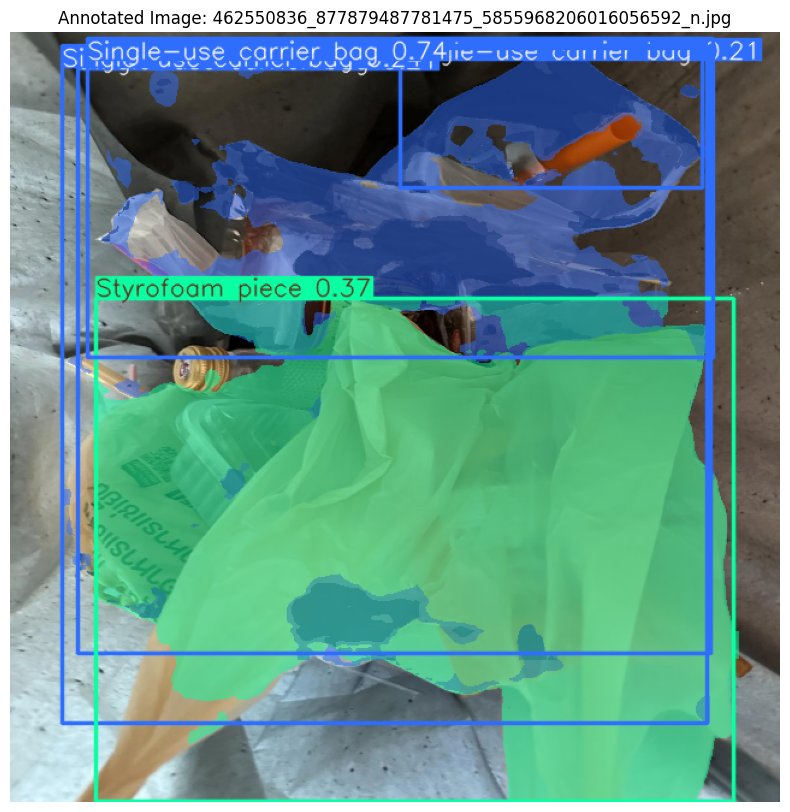

จำนวนขยะที่พบ:
Single-use carrier bag: 4
Styrofoam piece: 1


In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import yaml
from collections import defaultdict

# โหลดโมเดลที่ฝึกสอนแล้ว
model = YOLO('train/weights/best.pt')

# ระบุ path ของไฟล์ภาพเดียว
image_path = "tu_waste_2/462550836_877879487781475_5855968206016056592_n.jpg"  # เปลี่ยนชื่อไฟล์เป็นไฟล์ที่ต้องการประมวลผล

# อ่านชื่อ class จากไฟล์ data.yaml
with open('data.yaml', 'r') as file:
    data = yaml.safe_load(file)
    class_mapping = {i: name for i, name in enumerate(data['names'])}  # สร้าง dictionary จากชื่อ class

# สร้าง dictionary สำหรับนับจำนวน class
class_counts = defaultdict(int)

# โหลดภาพ
image = cv2.imread(image_path)  # ใช้ OpenCV ในการอ่านภาพ
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # แปลงสีจาก BGR เป็น RGB
image_resized = cv2.resize(image_rgb, (640, 640))  # ปรับขนาดภาพเป็น 640x640

# ทำการประมวลผลภาพ
results = model(image_resized, conf=0.2, iou=0.9)  # ทำการตรวจจับวัตถุในภาพ

# วาดผลลัพธ์ลงบนภาพ
annotated_image = results[0].plot()  # สร้างภาพที่มีการ annotate

# นับจำนวน class ที่พบ
for result in results[0].boxes.data:
    class_id = int(result[5])  # ID ของ class
    class_name = class_mapping.get(class_id, "Unknown")  # รับชื่อ class
    class_counts[class_name] += 1  # เพิ่มจำนวน class ที่พบ

# แสดงภาพ
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.title(f"Annotated Image: {image_path.split('/')[-1]}")
plt.axis('off')  # ปิดแกน
plt.show()

# แสดงผลสถิติ class ที่พบ
print("จำนวนขยะที่พบ:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")


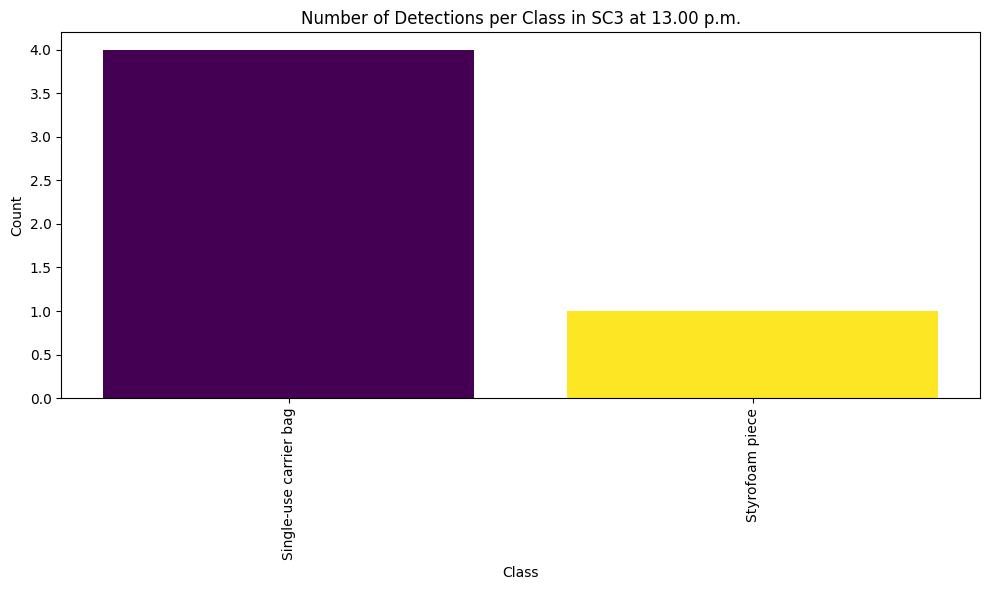

จำนวนขยะที่พบ:
Single-use carrier bag: 4
Styrofoam piece: 1


In [7]:
# สร้างกราฟแท่งสำหรับจำนวน class ที่ตรวจจับได้
class_names_list = list(class_counts.keys())
counts = list(class_counts.values())

# สร้างสีที่แตกต่างกันสำหรับแต่ละ class
colors = plt.cm.viridis(np.linspace(0, 1, len(class_names_list)))

# วาดกราฟ
plt.figure(figsize=(10, 6))
plt.bar(class_names_list, counts, color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Detections per Class in SC3 at 13.00 p.m.')
plt.xticks(rotation=90)  # หมุนชื่อ class เพื่อไม่ให้ทับกัน
plt.tight_layout()
plt.show()
print("จำนวนขยะที่พบ:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")